## Revenue change in Taxi, FHV, and Public Tranportation after the surcharges (based on the modeling results)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Scaled_results_scenario1_0.05_1.5.csv')
data = data.set_index('Unnamed: 0')
data1 = pd.read_csv('Scaled_results_scenario2_0.05_1.5.csv')
#data1 = data1.drop(['Unnamed: 0'],axis=1)
data1 = data1.set_index('Unnamed: 0')
data2 = pd.read_csv('Scaled_results_scenario3_0.05_1.5.csv')
data2 = data2.set_index('Unnamed: 0')
ground = pd.read_csv("final_acs_transportation_choice.csv")

In [3]:
data1.head()

,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5),P(mode6)
Unnamed: 0,,,,,,
3-4,0.0,0.0,0.0,4.701090,0.336062,1.294283
3-7,0.0,0.0,0.0,14.565171,1.964062,15.565696
3-9,0.0,0.0,0.0,0.170414,0.097705,1.234596
3-10,0.0,0.0,0.0,0.190442,0.168097,1.877983
3-11,0.0,0.0,0.0,4.672373,0.196565,0.000388


In [4]:
ground.sum()

taxi_zone    3.259800e+04
P(mode1)     9.720936e+03
P(mode2)     1.475381e+04
P(mode3)     5.745300e+03
P(mode4)     1.756041e+06
P(mode5)     3.071924e+05
P(mode6)     7.865649e+05
dtype: float64

In [5]:
#data1.drop('Unnamed: 0',axis=1,inplace=True)
data.sum().values

array([   9720.93564923,   14753.80678305,    5745.29989927,
       1756040.67350759,  307192.42033239,  786564.86382847])

In [6]:
data1.sum().values

array([   5728.49571749,   14263.27060608,    8142.62797891,
       1778710.78507825,  309053.24073351,  788280.90711814])

In [7]:
data2.sum().values

array([   3830.31736652,   14260.57051296,   10572.69399303,
       1901864.3427415 ,  311130.82499388,  723978.51363243])

In [8]:
data['pair'] = data.index
data['origin'] = data['pair'].str.rsplit("-", expand=True)[0].astype(int)
data['destination'] = data['pair'].str.rsplit("-", expand=True)[1].astype(int)
data2['pair'] = data2.index
data2['origin'] = data['pair'].str.rsplit("-", expand=True)[0].astype(int)
data2['destination'] = data['pair'].str.rsplit("-", expand=True)[1].astype(int)
data1['pair'] = data1.index
data1['origin'] = data['pair'].str.rsplit("-", expand=True)[0].astype(int)
data1['destination'] = data['pair'].str.rsplit("-", expand=True)[1].astype(int)

In [9]:
cleaned_data= pd.read_csv('final_allMode_with_2017wage_cleaned_update.csv')
taxi_price = cleaned_data[cleaned_data['mode']==1][['PUlocationID','DOlocationID','price']]
fhv_price = cleaned_data[cleaned_data['mode']==2][['PUlocationID','DOlocationID','price']]
fhv_s_price = cleaned_data[cleaned_data['mode']==3][['PUlocationID','DOlocationID','price']]
pt_price = cleaned_data[cleaned_data['mode']==4][['PUlocationID','DOlocationID','price']]
pv_price = cleaned_data[cleaned_data['mode']==6][['PUlocationID','DOlocationID','price']]

In [10]:
taxi = pd.DataFrame()
taxi['pickup']=data['origin']
taxi['dropoff']=data['destination']
taxi = taxi.merge(ground[['P(mode1)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
taxi = taxi.merge(data[['origin','destination','P(mode1)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
taxi.rename(columns = {'P(mode1)_x': 'ground_choice', 'P(mode1)_y': 'model result with no fee'},inplace=True)
#taxi
taxi = taxi.merge(data1[['origin','destination','P(mode1)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
taxi = taxi.merge(data2[['origin','destination','P(mode1)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
taxi = taxi.merge(taxi_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
taxi = taxi.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
taxi.rename(columns = {'P(mode1)_x':'model result with $2.75', 'P(mode1)_y': 'model result with $10'},inplace=True)
taxi_revenue = pd.DataFrame()
#taxi_revenue['groud_total_revenue'] = taxi['ground_choice']*taxi['price']
taxi_revenue['no fee total_revenue'] = taxi['model result with no fee']*taxi['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
taxi_revenue['$2.75 total_revenue'] = taxi['model result with $2.75']*taxi['price']
taxi_revenue['$10 total_revenue'] = taxi['model result with $10']*taxi['price']
taxi_revenue.head(10)

,no fee total_revenue,$2.75 total_revenue,$10 total_revenue
0,0.000000,0.000000,0.000000
1,0.031393,0.031393,0.031393
2,5.800082,5.800082,5.800082
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,14.675547,14.675547,14.675547
6,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000


In [11]:
revenue_change = pd.DataFrame(taxi_revenue.sum()).T
revenue_change['revenue change from no fee to $2.75'] = revenue_change['$2.75 total_revenue']-revenue_change['no fee total_revenue']
revenue_change['revenue change from  2.75 to 10']= revenue_change['$10 total_revenue']- revenue_change['$2.75 total_revenue']
revenue_change['revenue change from no fee to $10']= revenue_change['$10 total_revenue'] - revenue_change['no fee total_revenue']
revenue_change = revenue_change.T
revenue_change.rename(columns = {0:'Taxi'},inplace=True)

In [12]:
fhv = pd.DataFrame()
fhv ['pickup']=data['origin']
fhv ['dropoff']=data['destination']
fhv  = fhv .merge(ground[['P(mode2)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
fhv  = fhv .merge(data[['origin','destination','P(mode2)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv .rename(columns = {'P(mode2)_x': 'ground_choice', 'P(mode2)_y': 'model result with no fee'}, inplace=True)
fhv  = fhv .merge(data1[['origin','destination','P(mode2)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv  = fhv .merge(data2[['origin','destination','P(mode2)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv  = fhv .merge(fhv_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
fhv  = fhv.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
fhv.rename(columns = {'P(mode2)_x':'model result with $2.75', 'P(mode2)_y': 'model result with $10'},inplace=True)
fhv_revenue = pd.DataFrame()
#taxi_revenue['groud_total_revenue'] = taxi['ground_choice']*taxi['price']
fhv_revenue['no fee total_revenue'] = fhv['model result with no fee']*fhv['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
fhv_revenue['$2.75 total_revenue'] = fhv['model result with $2.75']*fhv['price']
fhv_revenue['$10 total_revenue'] = fhv['model result with $10']*fhv['price']
#fhv_revenue.head(10)


In [13]:
fhv_revenue = pd.DataFrame(fhv_revenue.sum()).T
fhv_revenue['revenue change from no fee to $2.75'] =  fhv_revenue['$2.75 total_revenue']-fhv_revenue['no fee total_revenue']
fhv_revenue['revenue change from  2.75 to 10']= (fhv_revenue['$10 total_revenue']- fhv_revenue['$2.75 total_revenue'])
fhv_revenue['revenue change from no fee to $10']= fhv_revenue['$10 total_revenue']- fhv_revenue['no fee total_revenue']
revenue_change['FHV']= fhv_revenue.T[0]
#revenue_change
revenue_change

,Taxi,FHV
no fee total_revenue,74647.643667,137347.410598
$2.75 total_revenue,40770.664642,131416.640465
$10 total_revenue,26997.377618,131385.316031
revenue change from no fee to $2.75,-33876.979025,-5930.770133
revenue change from 2.75 to 10,-13773.287024,-31.324434
revenue change from no fee to $10,-47650.266049,-5962.094568


In [14]:
fhv_s = pd.DataFrame()
fhv_s['pickup']=data['origin']
fhv_s ['dropoff']=data['destination']
fhv_s= fhv_s.merge(ground[['P(mode3)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
fhv_s = fhv_s.merge(data[['origin','destination','P(mode3)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv_s.rename(columns = {'P(mode3)_x': 'ground_choice', 'P(mode3)_y': 'model result with no fee'}, inplace = True)
fhv_s= fhv_s.merge(data1[['origin','destination','P(mode3)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv_s= fhv_s.merge(data2[['origin','destination','P(mode3)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv_s= fhv_s.merge(fhv_s_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
fhv_s= fhv_s.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
fhv_s.rename(columns = {'P(mode3)_x':'model result with $2.75', 'P(mode3)_y': 'model result with $10'}, inplace = True)
fhv_s_revenue = pd.DataFrame()
#taxi_revenue['groud_total_revenue'] = taxi['ground_choice']*taxi['price']
fhv_s_revenue['no fee total_revenue'] = fhv_s['model result with no fee']*fhv_s['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
fhv_s_revenue['$2.75 total_revenue'] = fhv_s['model result with $2.75']*fhv_s['price']
fhv_s_revenue['$10 total_revenue'] = fhv_s['model result with $10']*fhv_s['price']
fhv_s_revenue = pd.DataFrame(fhv_s_revenue.sum()).T
fhv_s_revenue['revenue change from no fee to $2.75'] =  fhv_s_revenue['$2.75 total_revenue']-fhv_s_revenue['no fee total_revenue']
fhv_s_revenue['revenue change from  2.75 to 10']= fhv_s_revenue['$10 total_revenue']- fhv_s_revenue['$2.75 total_revenue']
fhv_s_revenue['revenue change from no fee to $10']= fhv_s_revenue['$10 total_revenue']- fhv_s_revenue['no fee total_revenue']
revenue_change['FHV_shared']= fhv_s_revenue.T[0]
revenue_change['FHV_total']= revenue_change['FHV']+revenue_change['FHV_shared']
#revenue_change

In [15]:
public_trans = pd.DataFrame()
public_trans['pickup']=data['origin']
public_trans['dropoff']=data['destination']
public_trans= public_trans.merge(ground[['P(mode4)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
public_trans = public_trans.merge(data[['origin','destination','P(mode4)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
public_trans.rename(columns = {'P(mode4)_x': 'ground_choice', 'P(mode4)_y': 'model result with no fee'}, inplace =True)
public_trans= public_trans.merge(data1[['origin','destination','P(mode4)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
public_trans= public_trans.merge(data2[['origin','destination','P(mode4)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
public_trans= public_trans.merge(pt_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
public_trans= public_trans.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
public_trans.rename(columns = {'P(mode4)_x':'model result with $2.75', 'P(mode4)_y': 'model result with $10'}, inplace =True)
public_trans_revenue = pd.DataFrame()
#taxi_revenue['groud_total_revenue'] = taxi['ground_choice']*taxi['price']
public_trans_revenue['no fee total_revenue'] = public_trans['model result with no fee']*public_trans['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
public_trans_revenue['$2.75 total_revenue'] = public_trans['model result with $2.75']*public_trans['price']
public_trans_revenue['$10 total_revenue'] = public_trans['model result with $10']*public_trans['price']
public_trans_revenue = pd.DataFrame(public_trans_revenue.sum()).T
public_trans_revenue['revenue change from no fee to $2.75'] =public_trans_revenue['$2.75 total_revenue']-public_trans_revenue['no fee total_revenue']
public_trans_revenue['revenue change from  2.75 to 10']= public_trans_revenue['$10 total_revenue']- public_trans_revenue['$2.75 total_revenue']
public_trans_revenue['revenue change from no fee to $10']= public_trans_revenue['$10 total_revenue']- public_trans_revenue['no fee total_revenue']
revenue_change['Public Transportation']= public_trans_revenue.T[0]
revenue_change

,Taxi,FHV,FHV_shared,FHV_total,Public Transportation
no fee total_revenue,74647.643667,137347.410598,52712.809233,190060.219832,7.526549e+06
$2.75 total_revenue,40770.664642,131416.640465,75251.941439,206668.581904,7.601063e+06
$10 total_revenue,26997.377618,131385.316031,100544.668019,231929.984049,8.153839e+06
revenue change from no fee to $2.75,-33876.979025,-5930.770133,22539.132206,16608.362072,7.451370e+04
revenue change from 2.75 to 10,-13773.287024,-31.324434,25292.726580,25261.402145,5.527766e+05
revenue change from no fee to $10,-47650.266049,-5962.094568,47831.858785,41869.764218,6.272903e+05


In [16]:
private = pd.DataFrame()
private['pickup']=data['origin']
private['dropoff']=data['destination']
private = private.merge(ground[['P(mode6)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
private = private.merge(data[['origin','destination','P(mode6)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
private.rename(columns = {'P(mode6)_x': 'ground_choice', 'P(mode6)_y': 'model result with no fee'}, inplace =True)
private = private.merge(data1[['origin','destination','P(mode6)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
private = private.merge(data2[['origin','destination','P(mode6)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
private= private.merge(pt_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
private= private.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
private.rename(columns = {'P(mode6)_x':'model result with $2.75', 'P(mode6)_y': 'model result with $10'}, inplace =True)
privates_revenue = pd.DataFrame()
privates_revenue['no fee total_revenue'] = private['model result with no fee']*private['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
privates_revenue['$2.75 total_revenue'] = private['model result with $2.75']*private['price']
privates_revenue['$10 total_revenue'] = private['model result with $10']*private['price']
privates_revenue = pd.DataFrame(privates_revenue.sum()).T
privates_revenue['revenue change from no fee to $2.75'] =privates_revenue['$2.75 total_revenue']-privates_revenue['no fee total_revenue']
privates_revenue['revenue change from  2.75 to 10']= privates_revenue['$10 total_revenue']- privates_revenue['$2.75 total_revenue']
privates_revenue['revenue change from no fee to $10']= privates_revenue['$10 total_revenue']- privates_revenue['no fee total_revenue']
revenue_change['Private vehicles']= privates_revenue.T[0]
revenue_change

,Taxi,FHV,FHV_shared,FHV_total,Public Transportation,Private vehicles
no fee total_revenue,74647.643667,137347.410598,52712.809233,190060.219832,7.526549e+06,4.351445e+06
$2.75 total_revenue,40770.664642,131416.640465,75251.941439,206668.581904,7.601063e+06,4.357677e+06
$10 total_revenue,26997.377618,131385.316031,100544.668019,231929.984049,8.153839e+06,4.059639e+06
revenue change from no fee to $2.75,-33876.979025,-5930.770133,22539.132206,16608.362072,7.451370e+04,6.231811e+03
revenue change from 2.75 to 10,-13773.287024,-31.324434,25292.726580,25261.402145,5.527766e+05,-2.980384e+05
revenue change from no fee to $10,-47650.266049,-5962.094568,47831.858785,41869.764218,6.272903e+05,-2.918066e+05


In [17]:
revenue_change.to_csv('revenue_change.csv')

Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


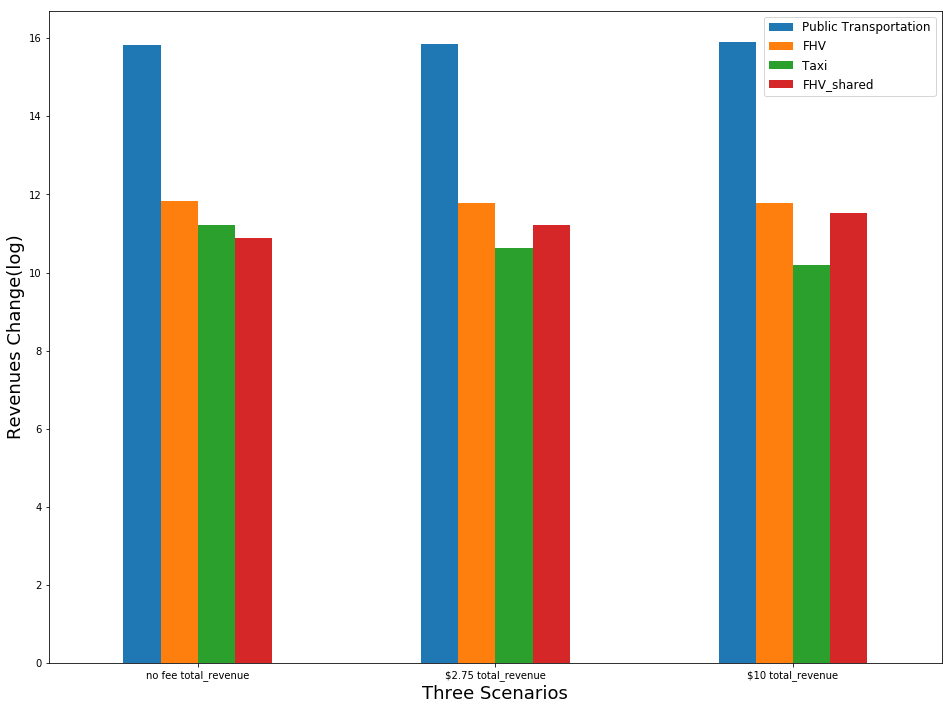

In [18]:
import matplotlib.pylab as plt
import numpy as np
%pylab inline
rev = revenue_change.drop(['FHV_total'],axis=1).iloc[:3]
rev = np.log(rev)
#rev = rev.iloc[:3]

rev = rev[['Public Transportation','FHV','Taxi','FHV_shared']]
# rev

rev.plot(kind='bar',figsize=(16,12), rot=0)
plt.ylabel("Revenues Change(log)",fontsize=18)
plt.xlabel("Three Scenarios",fontsize=18)
plt.legend(fontsize=12)
plt.savefig('Revenues change in 3 scenarios', edgecolor='w',
        orientation='portrait', transparent=False)
plt.show()

## Tax Revenue

In [19]:
zones_2_75 = [140,141, 237, 236, 263, 262, 43, 238, 239, 143,142, 12, 88, 261, 13, 87,
              209, 231, 45, 232, 148, 144, 211, 125, 158,  249, 114, 113, 79, 4, 224, 107, 234, 90, 68,
              246, 186, 164, 100, 170, 137, 233, 162, 161, 230, 48, 50, 163, 229]
zones_10 = [12, 88, 261, 13, 87, 209, 231, 45, 232, 148, 144, 211, 125, 158,  249, 114,
            113, 79, 4, 224, 107, 234, 90, 68, 246, 186, 164, 100, 170, 137, 233, 162, 161, 230, 48, 50, 163, 229]

In [20]:
population_2_75 = data1[data1['origin'].isin(zones_2_75)|data1['destination'].isin(zones_2_75)]
population_2_75 = pd.DataFrame(population_2_75.sum()).T
population_2_75_total_rev = population_2_75['P(mode1)']*2 + population_2_75['P(mode2)']*2.75+population_2_75['P(mode3)']*.5
population_2_75_total_rev

0    9185.09
dtype: object

In [21]:
population_10 = data2[data2['origin'].isin(zones_10) | data2['destination'].isin(zones_10)]
population_10 = pd.DataFrame(population_10.sum()).T
population_10_total_rev = population_10['P(mode1)']*7.27 + population_10['P(mode2)']*10+ population_10['P(mode3)']*2.33
+population_10['P(mode6)']*10
population_10_total_rev

0    20949.3
dtype: object

In [22]:
population_10

,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5),P(mode6),pair,origin,destination
0,201.405,5.31254e-08,8362.7,1.4578e+06,143090,55035.7,3-43-133-453-483-503-683-793-873-883-903-1003-...,2111533,2151437


In [23]:
population_2_75

,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5),P(mode6),pair,origin,destination
0,3073.11,2.70626,6062.86,1.46149e+06,161809,153376,3-43-133-433-453-483-503-683-793-873-883-903-1...,2782843,2823726


In [24]:
population_2_75['P(mode1)'] + population_2_75['P(mode2)']+population_2_75['P(mode3)']

0    9138.67
dtype: object

In [25]:
baseline_2_75 = data[data['origin'].isin(zones_2_75) | data['destination'].isin(zones_2_75)]
baseline_2_75 = pd.DataFrame(baseline_2_75.sum()).T
baseline_2_75_total_rev = baseline_2_75['P(mode1)']*2 + baseline_2_75['P(mode2)']*2.75+baseline_2_75['P(mode3)']*.5
baseline_2_75_total_rev

0    17320.3
dtype: object

In [26]:
baseline_10 = data[data['origin'].isin(zones_10) | data['destination'].isin(zones_10)]
baseline_10 = pd.DataFrame(baseline_10.sum()).T
baseline_10_total_rev = baseline_10['P(mode1)']*7.27 + baseline_10['P(mode2)']*10+baseline_10['P(mode3)']*2.73+baseline_10['P(mode6)']*10
baseline_10_total_rev

0    1.23509e+06
dtype: object

In [27]:
tax_revenue = pd.DataFrame()

In [28]:
tax_revenue['Baseline revenue - $2.75'] = baseline_2_75_total_rev
tax_revenue['revenue after mode shift - $2.75'] = population_2_75_total_rev
tax_revenue['Baseline revenue - $10'] = baseline_10_total_rev
tax_revenue['revenue after mode shift -  $10'] = population_10_total_rev
#tax_revenue.T.rename(columns = {0:'Tax Revenue'},inplace = T).T
tax_revenue = tax_revenue.T
tax_revenue.rename(columns = {0:'Tax Revenue'},inplace = True)
tax_revenue = tax_revenue.T
tax_revenue

,Baseline revenue - $2.75,revenue after mode shift - $2.75,Baseline revenue - $10,revenue after mode shift - $10
Tax Revenue,17320.3,9185.09,1.23509e+06,20949.3


In [29]:
tax_revenue.to_csv('tax.csv')

# Change in Ridership

## From No surcharge to $2.75 surcharge (negative number represent decrease in ridership) :

In [30]:
pd.DataFrame(data1.sum()).T [['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']] - pd.DataFrame(data.sum()).T[['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']]


,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5),P(mode6)
0,-3992.44,-490.536,2397.33,22670.1,1860.82,1716.04


In [31]:
no_fee_to_2_75 = pd.DataFrame(data1.sum()).T [['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']] - pd.DataFrame(data.sum()).T[['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']]
#no_fee_to_2_75 = no_fee_to_2_75.drop(['ODpair','Unnamed: 0','destination','origin'],axis = 1)
no_fee_to_2_75.rename(columns = {'P(mode1)':'Taxi', 'P(mode2)':'FHV', 'P(mode3)':'FHV_shared', 'P(mode4)':'Public Transportation',
                       'P(mode5)':'Walking','P(mode6)':'Private'}, inplace = True )
Total_change_in_all_FHV_2_75 = no_fee_to_2_75.FHV + no_fee_to_2_75.FHV_shared
Total_change_in_Taxi_FHV_2_75 = no_fee_to_2_75.Taxi + Total_change_in_all_FHV_2_75
print('Total riderhsip change in Taxi: %d' %no_fee_to_2_75['Taxi'])
print('Total riderhsip change in FHV: %d' %Total_change_in_all_FHV_2_75)
print('Total riderhsip change in Taxi and FHV: %d' %Total_change_in_Taxi_FHV_2_75)
print('Total riderhsip change in Public Transportation: %d' %no_fee_to_2_75['Public Transportation'])
print('Total riderhsip change in Walking: %d' %no_fee_to_2_75['Walking'])
print('Total riderhsip change in Private: %d' %no_fee_to_2_75['Private'])
no_fee_to_2_75

Total riderhsip change in Taxi: -3992
Total riderhsip change in FHV: 1906
Total riderhsip change in Taxi and FHV: -2085
Total riderhsip change in Public Transportation: 22670
Total riderhsip change in Walking: 1860
Total riderhsip change in Private: 1716


,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-3992.44,-490.536,2397.33,22670.1,1860.82,1716.04


## From 2.75 dollar surcharge to 10 dollar surcharge:

In [32]:
from_2_75_to_10 = pd.DataFrame(data2.sum()).T [['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']] - pd.DataFrame(data1.sum()).T [['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']]
#from_2_75_to_10 = from_2_75_to_10.drop(['ODpair','Unnamed: 0','destination','origin'],axis = 1)
from_2_75_to_10.rename(columns ={'P(mode1)':'Taxi', 'P(mode2)':'FHV', 'P(mode3)':'FHV_shared', 
                                             'P(mode4)':'Public Transportation','P(mode5)':'Walking','P(mode6)':'Private'}, 
                                  inplace = True )
Total_change_in_all_FHV_10 = from_2_75_to_10.FHV + from_2_75_to_10.FHV_shared
Total_change_in_Taxi_FHV_10 = from_2_75_to_10.Taxi + Total_change_in_all_FHV_10
print('Total riderhsip change in Taxi: %d' %from_2_75_to_10['Taxi'])
print('Total riderhsip change in FHV: %d' %Total_change_in_all_FHV_10)
print('Total riderhsip change in Taxi and FHV: %d' % Total_change_in_Taxi_FHV_10)
print('Total riderhsip change in Public Transportation: %d' %from_2_75_to_10['Public Transportation'])
print('Total riderhsip change in Walking: %d' %from_2_75_to_10['Walking'])
from_2_75_to_10

Total riderhsip change in Taxi: -1898
Total riderhsip change in FHV: 2427
Total riderhsip change in Taxi and FHV: 529
Total riderhsip change in Public Transportation: 123153
Total riderhsip change in Walking: 2077


,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-1898.18,-2.70009,2430.07,123154,2077.58,-64302.4


## From no surcharge to $10 surcharge:

In [33]:
no_fee_to_10 = no_fee_to_2_75+from_2_75_to_10
no_fee_to_10

,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-5890.62,-493.236,4827.39,145824,3938.4,-62586.4


In [34]:
Total_change_in_all_FHV_no_10 = no_fee_to_10.FHV + no_fee_to_10.FHV_shared
Total_change_in_Taxi_FHV_no_10 = no_fee_to_10.Taxi + Total_change_in_all_FHV_no_10
print('Total riderhsip change in Taxi: %d' %no_fee_to_10['Taxi'])
print('Total riderhsip change in FHV: %d' %Total_change_in_all_FHV_no_10)
print('Total riderhsip change in Taxi and FHV: %d' % Total_change_in_all_FHV_no_10)
print('Total riderhsip change in Public Transportation: %d' %no_fee_to_10['Public Transportation'])
print('Total riderhsip change in Walking: %d' %no_fee_to_10['Walking'])

Total riderhsip change in Taxi: -5890
Total riderhsip change in FHV: 4334
Total riderhsip change in Taxi and FHV: 4334
Total riderhsip change in Public Transportation: 145823
Total riderhsip change in Walking: 3938


In [35]:
no_fee_to_10

,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-5890.62,-493.236,4827.39,145824,3938.4,-62586.4


In [36]:
all_scenarios = pd.concat([no_fee_to_2_75,from_2_75_to_10])
all_scenarios
#all_scenarios.reindex(['0 to $2.75','2.75 to $10','0 to $10'])

,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-3992.44,-490.536,2397.33,22670.1,1860.82,1716.04
0,-1898.18,-2.70009,2430.07,123154,2077.58,-64302.4


# change in distance (for environmental impact)

In [37]:
taxi.head()

,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price
0,3.0,7.0,0.115434,0.000000,0.000000,0.000000,43.157143
1,3.0,18.0,0.115434,0.002434,0.002434,0.002434,12.900000
2,3.0,20.0,0.115434,0.570500,0.570500,0.570500,10.166667
3,3.0,25.0,0.115434,0.000000,0.000000,0.000000,63.000000
4,3.0,26.0,0.115434,0.000000,0.000000,0.000000,77.000000


In [38]:
distance = pd.read_csv('FHV_with_distance_revised.csv')
distance.head()

,Unnamed: 0,Year,Month,PUlocationID,DOlocationID,Shared_FHV,Total_FHV,PU_zone,geometry_PU,DO_zone,geometry_DO,trip_std,trip_count,Formula_dist,Regression_dist
0,0,2017,7,1.0,1.0,0,5,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Newark Airport,POINT (-74.17400156582249 40.69183016020938),4.802251,2467.0,0.000000,1.266117
1,1,2017,7,1.0,4.0,2,9,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Alphabet City,POINT (-73.97696827424141 40.72375208451213),NaN,0.0,16.945854,15.421511
2,2,2017,7,1.0,5.0,0,9,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Arden Heights,POINT (-74.18848459794721 40.55265878064323),NaN,0.0,15.489240,14.110838
3,3,2017,7,1.0,6.0,0,9,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Arrochar/Fort Wadsworth,POINT (-74.07177024696533 40.6003244094682),NaN,0.0,13.309473,12.149467
4,4,2017,7,1.0,7.0,0,1,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Astoria,POINT (-73.91969433569462 40.76149261704292),NaN,0.0,22.736622,20.632089


In [39]:
taxi_dis = taxi.merge(distance[['PUlocationID','DOlocationID','Regression_dist']], left_on = ['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])

In [40]:
taxi_dis = taxi_dis.drop_duplicates()
taxi_dis.reset_index(inplace=True)
taxi_dis.head()

,index,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price,PUlocationID,DOlocationID,Regression_dist
0,0,3.0,7.0,0.115434,0.000000,0.000000,0.000000,43.157143,3.0,7.0,12.700000
1,18,3.0,18.0,0.115434,0.002434,0.002434,0.002434,12.900000,3.0,18.0,4.000000
2,36,3.0,20.0,0.115434,0.570500,0.570500,0.570500,10.166667,3.0,20.0,2.595000
3,54,3.0,25.0,0.115434,0.000000,0.000000,0.000000,63.000000,3.0,25.0,20.290000
4,70,3.0,26.0,0.115434,0.000000,0.000000,0.000000,77.000000,3.0,26.0,25.818044


In [41]:
taxi_total_distance = pd.DataFrame()
taxi_total_distance['no fee total_distance'] = taxi_dis['model result with no fee']*taxi_dis['Regression_dist']
taxi_total_distance['$2.75 total_distance'] = taxi_dis['model result with $2.75']*taxi_dis['Regression_dist']
taxi_total_distance['$10 total_distance'] = taxi_dis['model result with $10']*taxi_dis['Regression_dist']
taxi_total_distance.head(10)

,no fee total_distance,$2.75 total_distance,$10 total_distance
0,0.000000,0.000000,0.000000
1,0.009734,0.009734,0.009734
2,1.480447,1.480447,1.480447
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,2.900300,2.900300,2.900300
6,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000


In [42]:
total_distance = pd.DataFrame(taxi_total_distance.sum()).T
total_distance ['distance change from no fee to $2.75'] = total_distance ['$2.75 total_distance']-total_distance ['no fee total_distance']
total_distance ['distance change from  2.75 to 10']= total_distance ['$10 total_distance']- total_distance ['$2.75 total_distance']
total_distance ['distance change from no fee to $10']= total_distance ['$10 total_distance'] - total_distance ['no fee total_distance']
total_distance  = total_distance .T
total_distance .rename(columns = {0:'Taxi'},inplace=True)

In [43]:
fhv_dis = fhv.merge(distance[['PUlocationID','DOlocationID','Regression_dist']], left_on = ['pickup','dropoff'],
           right_on = ['PUlocationID','DOlocationID'])
fhv_dis = fhv_dis.drop_duplicates()
fhv_dis.reset_index(inplace=True)
# fhv_dis.shape
fhv_dis.head()

,index,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price,PUlocationID,DOlocationID,Regression_dist
0,0,3.0,4.0,17.843262,0.0,0.0,0.0,64.0,3.0,4.0,15.500000
1,18,3.0,7.0,17.843262,0.0,0.0,0.0,47.0,3.0,7.0,12.700000
2,36,3.0,9.0,17.843262,0.0,0.0,0.0,39.0,3.0,9.0,12.357726
3,53,3.0,10.0,17.843262,0.0,0.0,0.0,69.5,3.0,10.0,19.179934
4,71,3.0,11.0,17.843262,0.0,0.0,0.0,91.0,3.0,11.0,28.834000


In [44]:
fhv_total_distance = pd.DataFrame()
fhv_total_distance['no fee total_distance'] = fhv_dis['model result with no fee']*fhv_dis['Regression_dist']
fhv_total_distance['$2.75 total_distance'] = fhv_dis['model result with $2.75']*fhv_dis['Regression_dist']
fhv_total_distance['$10 total_distance'] = fhv_dis['model result with $10']*fhv_dis['Regression_dist']
fhv_total_distance = pd.DataFrame(fhv_total_distance.sum()).T
fhv_total_distance['distance change from no fee to $2.75'] =  fhv_total_distance['$2.75 total_distance']-fhv_total_distance['no fee total_distance']
fhv_total_distance['distance change from  2.75 to 10']= (fhv_total_distance['$10 total_distance']- fhv_total_distance['$2.75 total_distance'])
fhv_total_distance['distance change from no fee to $10']= fhv_total_distance['$10 total_distance']- fhv_total_distance['no fee total_distance']
total_distance['FHV']= fhv_total_distance.T[0]

total_distance

,Taxi,FHV
no fee total_distance,18731.919351,31347.418645
$2.75 total_distance,12107.586361,30475.878732
$10 total_distance,8204.857518,30470.861976
distance change from no fee to $2.75,-6624.332990,-871.539912
distance change from 2.75 to 10,-3902.728844,-5.016757
distance change from no fee to $10,-10527.061834,-876.556669


In [45]:
fhv_s_dis = fhv_s.merge(distance[['PUlocationID','DOlocationID','Regression_dist']], left_on = ['pickup','dropoff'],
           right_on = ['PUlocationID','DOlocationID'])
fhv_s_dis = fhv_s_dis.drop_duplicates()
fhv_s_dis.reset_index(inplace=True)
# fhv_dis.shape
fhv_s_dis.head()

,index,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price,PUlocationID,DOlocationID,Regression_dist
0,0,3.0,4.0,7.334361,0.0,0.0,0.0,61.5,3.0,4.0,15.500000
1,18,3.0,7.0,7.334361,0.0,0.0,0.0,45.0,3.0,7.0,12.700000
2,36,3.0,9.0,7.334361,0.0,0.0,0.0,38.0,3.0,9.0,12.357726
3,53,3.0,10.0,7.334361,0.0,0.0,0.0,66.5,3.0,10.0,19.179934
4,71,3.0,13.0,7.334361,0.0,0.0,0.0,66.5,3.0,13.0,20.025893


In [46]:
fhv_s_total_distance = pd.DataFrame()
fhv_s_total_distance['no fee total_distance'] = fhv_s_dis['model result with no fee']*fhv_s_dis['Regression_dist']
fhv_s_total_distance['$2.75 total_distance'] = fhv_s_dis['model result with $2.75']*fhv_s_dis['Regression_dist']
fhv_s_total_distance['$10 total_distance'] = fhv_s_dis['model result with $10']*fhv_s_dis['Regression_dist']
fhv_s_total_distance = pd.DataFrame(fhv_s_total_distance.sum()).T
fhv_s_total_distance['distance change from no fee to $2.75'] =  fhv_s_total_distance['$2.75 total_distance']-fhv_s_total_distance['no fee total_distance']
fhv_s_total_distance['distance change from  2.75 to 10']= (fhv_s_total_distance['$10 total_distance']- fhv_s_total_distance['$2.75 total_distance'])
fhv_s_total_distance['distance change from no fee to $10']= fhv_s_total_distance['$10 total_distance']- fhv_s_total_distance['no fee total_distance']
total_distance['FHV_shared']= fhv_s_total_distance.T[0]

total_distance

,Taxi,FHV,FHV_shared
no fee total_distance,18731.919351,31347.418645,9933.034740
$2.75 total_distance,12107.586361,30475.878732,13132.234612
$10 total_distance,8204.857518,30470.861976,14283.926549
distance change from no fee to $2.75,-6624.332990,-871.539912,3199.199872
distance change from 2.75 to 10,-3902.728844,-5.016757,1151.691937
distance change from no fee to $10,-10527.061834,-876.556669,4350.891809


In [47]:
private_dis = private.merge(distance[['PUlocationID','DOlocationID','Regression_dist']], left_on = ['pickup','dropoff'],
           right_on = ['PUlocationID','DOlocationID'])
private_dis = private_dis.drop_duplicates()
private_dis.reset_index(inplace=True)
# fhv_dis.shape
private_dis.head()

,index,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price,PUlocationID,DOlocationID,Regression_dist
0,0,3.0,4.0,4316.681764,1.294283,1.294283,0.868844,5.50,3.0,4.0,15.500000
1,18,3.0,7.0,4316.681764,15.565696,15.565696,15.565696,5.50,3.0,7.0,12.700000
2,36,3.0,9.0,4316.681764,1.234596,1.234596,1.234596,8.25,3.0,9.0,12.357726
3,53,3.0,10.0,4316.681764,1.877983,1.877983,1.877983,11.00,3.0,10.0,19.179934
4,71,3.0,11.0,4316.681764,0.000388,0.000388,0.000388,5.50,3.0,11.0,28.834000


In [48]:
private_total_distance = pd.DataFrame()
private_total_distance['no fee total_distance'] = private_dis['model result with no fee']*private_dis['Regression_dist']
private_total_distance['$2.75 total_distance'] = private_dis['model result with $2.75']*private_dis['Regression_dist']
private_total_distance['$10 total_distance'] = private_dis['model result with $10']*private_dis['Regression_dist']
private_total_distance = pd.DataFrame(private_total_distance.sum()).T
private_total_distance['distance change from no fee to $2.75'] =  private_total_distance['$2.75 total_distance']-fhv_s_total_distance['no fee total_distance']
private_total_distance['distance change from  2.75 to 10']= (private_total_distance['$10 total_distance']- private_total_distance['$2.75 total_distance'])
private_total_distance['distance change from no fee to $10']= private_total_distance['$10 total_distance']- private_total_distance['no fee total_distance']
total_distance['private']= private_total_distance.T[0]

total_distance

,Taxi,FHV,FHV_shared,private
no fee total_distance,18731.919351,31347.418645,9933.034740,6.992357e+06
$2.75 total_distance,12107.586361,30475.878732,13132.234612,6.996067e+06
$10 total_distance,8204.857518,30470.861976,14283.926549,6.454787e+06
distance change from no fee to $2.75,-6624.332990,-871.539912,3199.199872,6.986134e+06
distance change from 2.75 to 10,-3902.728844,-5.016757,1151.691937,-5.412801e+05
distance change from no fee to $10,-10527.061834,-876.556669,4350.891809,-5.375700e+05


In [49]:
total_distance.to_csv("total_distance(miles).csv")